# Code to evaluate the 3 body problem from Szebehely & Peters (1967)

In [ ]:
# Importing necessary libraries
import numpy as np  # NumPy provides numerical operations and arrays
from scipy.integrate import solve_ivp  # solve_ivp is used for solving initial value problems
import matplotlib.pyplot as plt  # Matplotlib is used for plotting

def three_body_problem(t, z):
    # Function defining the general three-body problem for solve_ivp
    # z = [x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]; t = time (unused)

    # Extracting positions and velocities
    dx12, dx13, dx23 = z[2] - z[0], z[4] - z[0], z[4] - z[2]
    dy12, dy13, dy23 = z[3] - z[1], z[5] - z[1], z[5] - z[3]

    # Distances between bodies
    r12 = np.sqrt(dx12**2 + dy12**2)  # |r1 - r2|
    r13 = np.sqrt(dx13**2 + dy13**2)  # |r1 - r3|
    r23 = np.sqrt(dx23**2 + dy23**2)  # |r2 - r3|

    # Initialize return state
    yp = np.zeros(12)
    yp[:6] = z[6:]

    # Equations of motion
    yp[6] = mass[2] * dx12 / r12**3 + mass[3] * dx13 / r13**3
    yp[7] = mass[2] * dy12 / r12**3 + mass[3] * dy13 / r13**3
    yp[8] = -mass[1] * dx12 / r12**3 + mass[3] * dx23 / r23**3
    yp[9] = -mass[1] * dy12 / r12**3 + mass[3] * dy23 / r23**3
    yp[10] = -mass[1] * dx13 / r13**3 - mass[2] * dx23 / r23**3
    yp[11] = -mass[1] * dy13 / r13**3 - mass[2] * dy23 / r23**3

    return yp

def write_to_file(file_name, time, state, header=True):
    # Function to write time and state to a file in CSV format
    if header:
        outfile = open(file_name, 'w')
        out_str = "#t,x1,y1,x2,y2,z2,x3,y3,z3\n"
        outfile.write(out_str)
    else:
        outfile = open(file_name, 'a')

    out_str = "%2.5f, " % time
    for j in range(0, 6):
        out_str += "%1.5f, " % state[j]
    outfile.write(out_str[:-2] + "\n")
    outfile.close()

# Initial conditions
mass = np.array([0, 3, 4, 5])  # Masses of the three bodies
initial_state = np.array([1, 3, -2, -1, 1, -1, 0, 0, 0, 0, 0, 0])  # Initial positions and velocities
time_step = 1e-2  # Time step for integration
time_points = np.arange(0, 80 + time_step, time_step)  # Time points for simulation

output_file = "three_body_data.txt"  # Output file name
write_to_file(output_file, 0, initial_state)  # Write initial state to the file

# Integration and data recording
for t in range(0, len(time_points) - 2):  # Exclude the last frame
    time_range = np.array([time_points[t], time_points[t + 1]])
    solution = solve_ivp(three_body_problem, time_range, initial_state, method='DOP853', t_eval=time_range,
                         rtol=1e-12, atol=1e-12)  # Solve the three-body problem
    initial_state = solution.y[:, -1]  # Update the initial state for the next iteration
    write_to_file(output_file, time_range[-1], initial_state, header=False)  # Write data to the file

# Plotting
data = np.genfromtxt(output_file, delimiter=',', comments='#')  # Load data from the file
time = data[:, 0]
data = data[:, 1:]

colors = ['red', 'green', 'b']  # Colors for the plot
line_styles = [':', '--', '-']  # Line styles for the plot
font_size = 'large'  # Font size for labels

text_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']  # Labels for subplots

fig = plt.figure(figsize=(10, 5), dpi=150)  # Create a figure for plotting
ax_list = []
for i in range(1, 8):  # Reduced the number of subplots
    ax_idx = 240 + i
    ax = fig.add_subplot(ax_idx)
    ax_list.append(ax)

for f in range(0, 7, 1):  # Reduced the number of iterations
    ax = ax_list[f]
    cut_idx = np.where(np.logical_and(time >= f * 10, time <= (f + 1) * 10))[0]
    temp_data = data[cut_idx, :]

    if f == 0:
        init_x = [temp_data[0, j % 6] for j in range(0, 8, 2)]
        init_y = [temp_data[0, j % 6] for j in range(1, 9, 2)]
    ax.plot(init_x, init_y, 'k-', lw=2, alpha=0.3, zorder=2)
    ax.plot(init_x, init_y, 'k.', ms=10, alpha=0.3, zorder=2)

    alphas = np.linspace(0.1, 1, len(cut_idx))[::-1]
    for j in range(0, 3):
        ax.plot(temp_data[:, 2 * j], temp_data[:, 2 * j + 1], ls=line_styles[j], color=colors[j], lw=1.5, zorder=5,
                alpha=0.75)  # Plotting the orbits
    ax.text(0.015, 0.92, text_labels[f], fontweight='bold', horizontalalignment='left', transform=ax.transAxes)
    ax.text(0.6, 0.05, 't=%i-%i' % (10 * f, 10 * (f + 1)), horizontalalignment='left', transform=ax.transAxes)

    if f > 3:
        ax.set_xlabel("X", fontsize=font_size)
    if f % 4 == 0:
        ax.set_ylabel("Y", fontsize=font_size)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

fig.subplots_adjust(hspace=0.2)  # Adjust subplot spacing
fig.savefig("3_body_orbits.png", bbox_inches='tight', dpi=150)  # Save the figure
plt.close()  # Close the figure


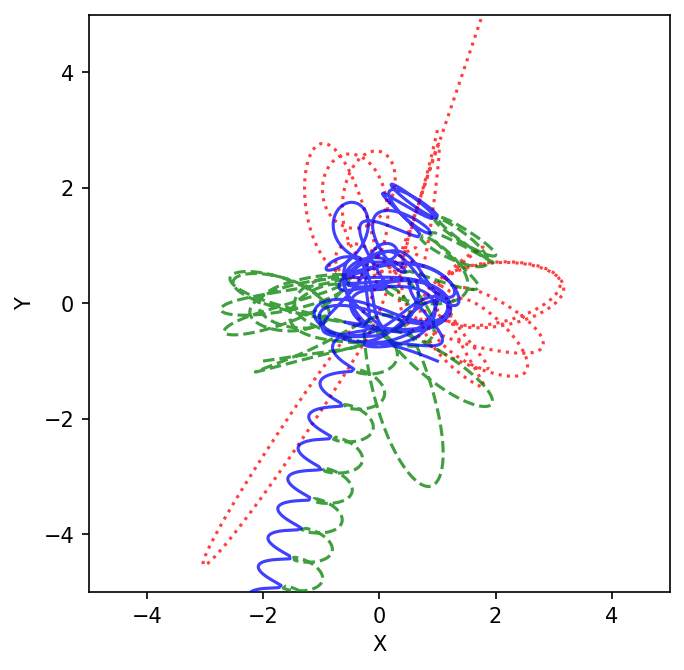

In [ ]:
# Plotting the overall motion
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Plotting the orbits
for j in range(0, 3):
    ax.plot(data[:, 2 * j], data[:, 2 * j + 1], ls=line_styles[j], color=colors[j], lw=1.5, zorder=5, alpha=0.75)

# Setting limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# Save the figure
fig.savefig("Overall_3_body_motion.png", bbox_inches='tight', dpi=150)
plt.show()
